In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data for given data set
import numpy as np
import pandas as pd
CarDataFrame=pd.read_csv("CarPrice_Assignment.csv")

#dropping the car ID coloumn as we dont need it in analysis
CarDataFrame.drop('car_ID',1,inplace=True)

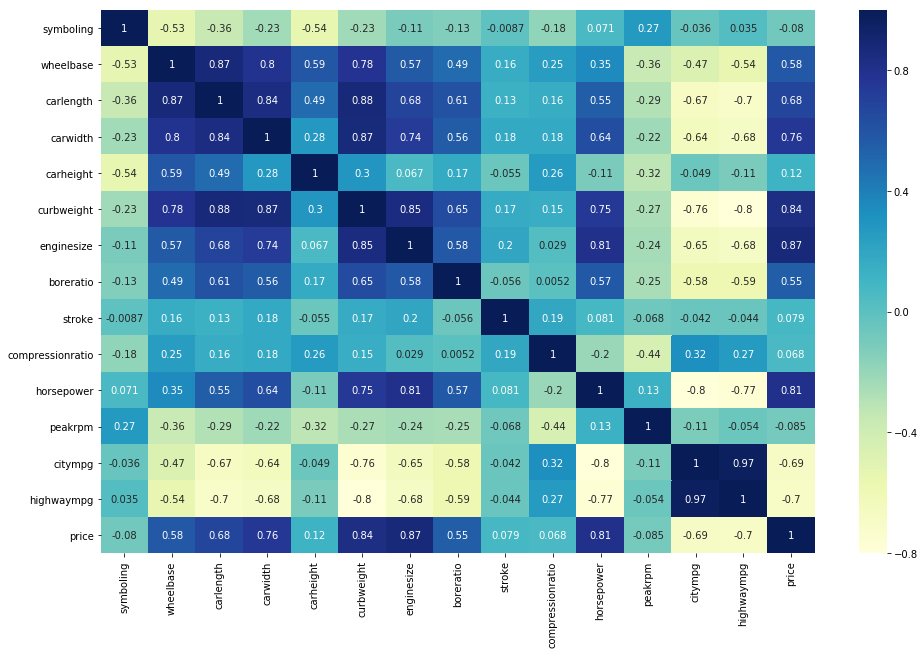

In [3]:
# Cheking for the correlation between different numeric coloumns.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 10))
sns.heatmap(CarDataFrame.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see in the corelation matrix that wheelbase,carlength,curbweight,enginesize,horsepower is positively correlated with price and citympg and highwaymp is having the negative correlation with price.

So this factors can have some effect on the price.

Also curbweight,carlength,carweight,carwidth and citympg and highwaympg are correlated with each other

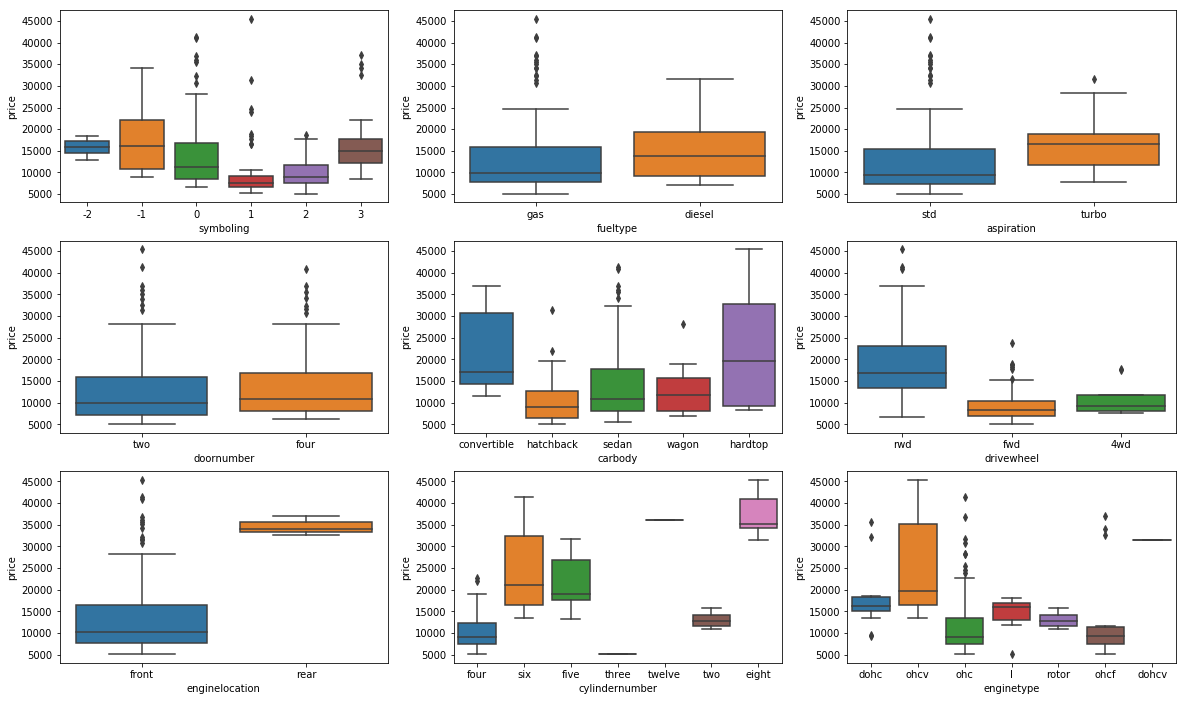

In [4]:
#ploting box plot graph for different categorical coloumns.

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = CarDataFrame)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = CarDataFrame)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = CarDataFrame)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = CarDataFrame)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = CarDataFrame)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarDataFrame)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarDataFrame)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarDataFrame)
plt.subplot(3,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = CarDataFrame)
plt.show()

From the box plot we can see tha enginelocation and drivewheel has some impact on the price.

Doornumber and fueltype has no such impact on the price.

In [5]:
#converting the carname coloumn into brand and model name
#we are intrested in brand name only.
CarDataFrame['CarBrand'] = CarDataFrame['CarName'].apply(lambda x: x.split()[0])

#dropping the car name coloum
CarDataFrame.drop('CarName',1,inplace=True)


#fixing the spelling mistake in Carbrand coloumn
CarDataFrame['CarBrand'] = CarDataFrame['CarBrand'].str.lower().replace('vw','volkswagen')
CarDataFrame['CarBrand'] = CarDataFrame['CarBrand'].str.lower().replace('vokswagen','volkswagen')
CarDataFrame['CarBrand'] = CarDataFrame['CarBrand'].str.lower().replace('toyouta','toyota')
CarDataFrame['CarBrand'] = CarDataFrame['CarBrand'].str.lower().replace('maxda','mazda')
CarDataFrame['CarBrand'] = CarDataFrame['CarBrand'].str.lower().replace('porcshce','porsche')

In [6]:
# Creating new variable for length vs width
CarDataFrame['LWRatio'] = CarDataFrame.carlength/CarDataFrame.carwidth
# Creating new variable width vs height
CarDataFrame['WHRatio'] = CarDataFrame.carwidth/CarDataFrame.carheight
# Creating new variable hoursepower vs curbweight
CarDataFrame['HPratio'] = CarDataFrame.horsepower/CarDataFrame.curbweight
# Creating new variable highway mileage vs citymileage
CarDataFrame['HCMratio'] = CarDataFrame.highwaympg/CarDataFrame.citympg

# droping the orignal correlated variables
CarDataFrame.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [7]:
#Converting categorical variables with two levels.

CarDataFrame['aspiration']=CarDataFrame['aspiration'].map({"std":1,"turbo":0})
CarDataFrame['doornumber']=CarDataFrame['doornumber'].map({"four":1,"two":0})
CarDataFrame['enginelocation']=CarDataFrame['enginelocation'].map({"front":1,"rear":0})
CarDataFrame['fueltype']=CarDataFrame['fueltype'].map({"gas":1,"diesel":0})


# Binning the symboling column into 3 level
#-2,-1 in safe
# 0,1, in  moderate
# 2,3 in risky
CarDataFrame['symboling'] = CarDataFrame['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [8]:
#genrate the dummies variable of the categorical data with more then 2 levels
CarDataFrame=pd.get_dummies(CarDataFrame,drop_first=True)
CarDataFrame.shape

(205, 65)

In [9]:
#Splitting the data into test data and train data

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(CarDataFrame, train_size = 0.7, test_size = 0.3, random_state = 100)

In [10]:
#scaling all the numeric value coloums

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','price','boreratio','LWRatio','WHRatio','HPratio','HCMratio']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.describe()

C:\Users\rkumarmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
y_train = df_train.pop('price')
X_train = df_train

In [12]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15) # running RFE

rfe = rfe.fit(X_train, y_train) 

In [13]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'HPratio', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CarBrand_bmw', 'CarBrand_porsche'],
      dtype='object')

In [14]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     118.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.97e-66
Time:                        22:05:22   Log-Likelihood:                 205.58
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     128   BIC:                            -336.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [15]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_vif = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype_rotor,inf
12,cylindernumber_two,inf
5,horsepower,85.400000
6,HPratio,75.410000
0,enginelocation,72.610000
2,enginesize,71.720000
9,cylindernumber_four,50.530000
3,boreratio,39.550000
4,stroke,31.260000
1,wheelbase,17.080000


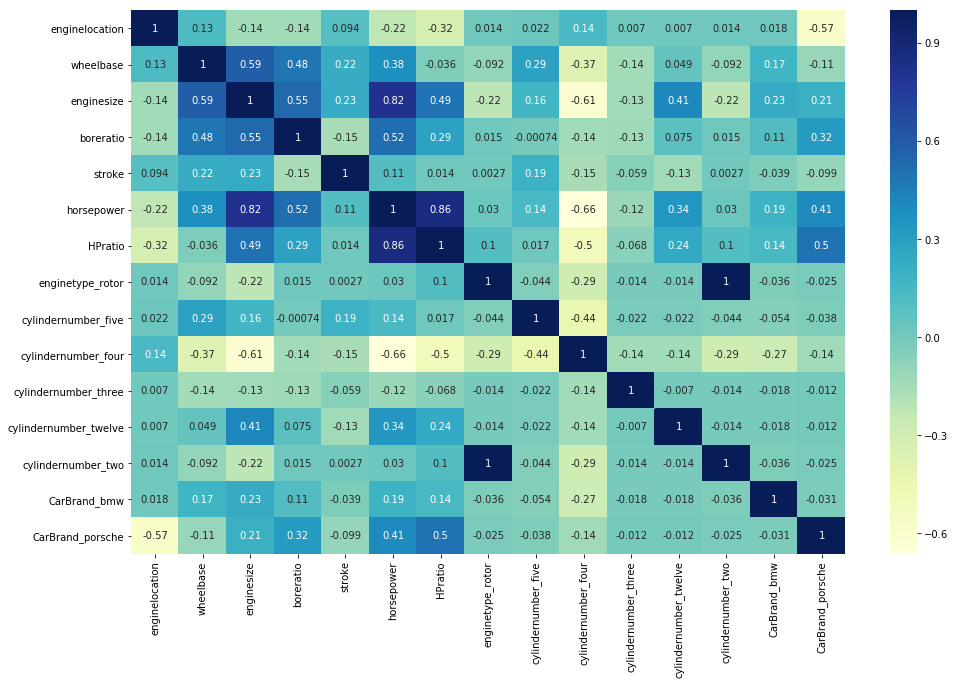

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_vif.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [17]:
# dropping cylindernumber_two as it has high correlation with engine_rotor feature

X_train_rfe = X_train_rfe.drop(["cylindernumber_two"], axis = 1)

#Rebuilding the model without `cylindernumber_two`
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)

lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     118.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.97e-66
Time:                        22:05:24   Log-Likelihood:                 205.58
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     128   BIC:                            -336.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [18]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_vif = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,85.40
6,HPratio,75.41
0,enginelocation,72.61
2,enginesize,71.72
9,cylindernumber_four,50.53
3,boreratio,39.55
4,stroke,31.26
1,wheelbase,17.08
7,enginetype_rotor,4.92
11,cylindernumber_twelve,2.85


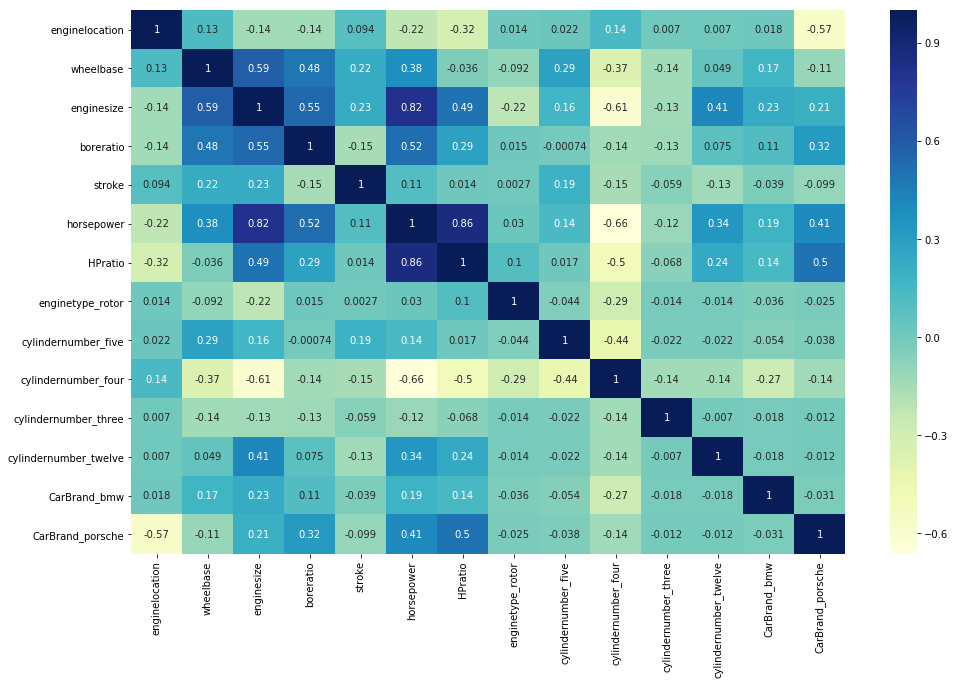

In [19]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_vif.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [20]:
#dropping horsepower feature as it has high vif and hig correaltion with enginesize and HPratio
X_train_rfe = X_train_rfe.drop(["horsepower"], axis = 1)

#Rebuilding the model without `horsepower`

# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)

lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           6.77e-63
Time:                        22:05:26   Log-Likelihood:                 194.54
No. Observations:                 143   AIC:                            -361.1
Df Residuals:                     129   BIC:                            -319.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

In [21]:
#checking for the VIF of new model features

X_train_vif = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,65.38
2,enginesize,63.99
8,cylindernumber_four,47.73
3,boreratio,38.45
4,stroke,31.06
1,wheelbase,13.45
5,HPratio,13.41
6,enginetype_rotor,4.92
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67


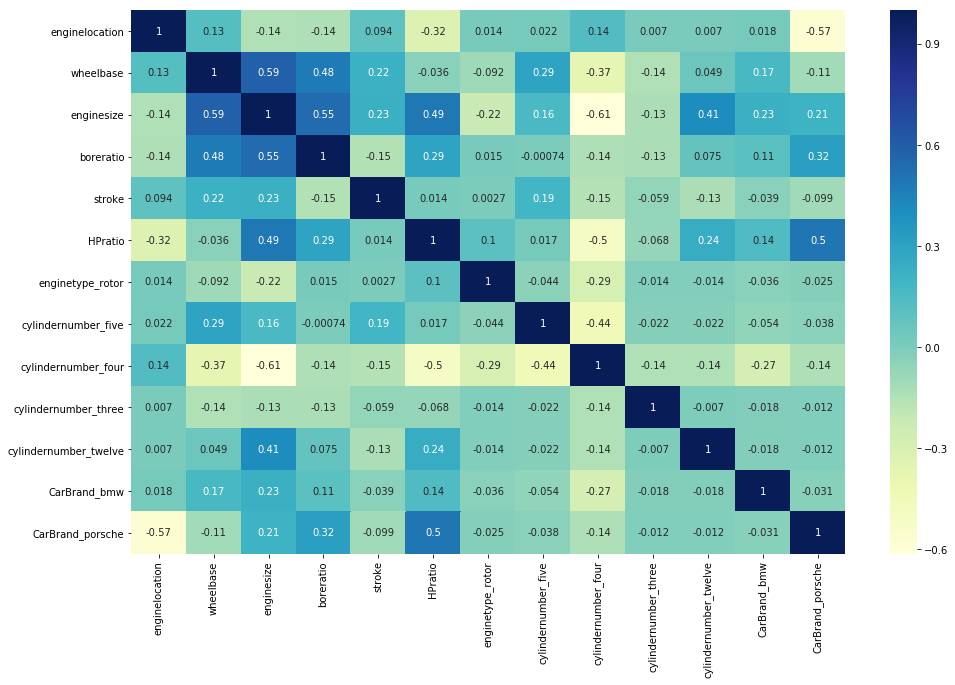

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_vif.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
#dropping enginelocation feature as it has high vif and high correlation weelbase,boreratio and cylindernumber_four
X_train_rfe = X_train_rfe.drop(["enginelocation"], axis = 1)

#Rebuilding the model without `enginelocation`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           4.52e-63
Time:                        22:05:28   Log-Likelihood:                 192.31
No. Observations:                 143   AIC:                            -358.6
Df Residuals:                     130   BIC:                            -320.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

In [24]:
#checking for the VIF of new model features

X_train_vif = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,52.43
2,boreratio,34.56
3,stroke,30.94
7,cylindernumber_four,23.37
0,wheelbase,12.49
4,HPratio,9.78
5,enginetype_rotor,3.57
9,cylindernumber_twelve,2.53
6,cylindernumber_five,2.04
11,CarBrand_porsche,1.59


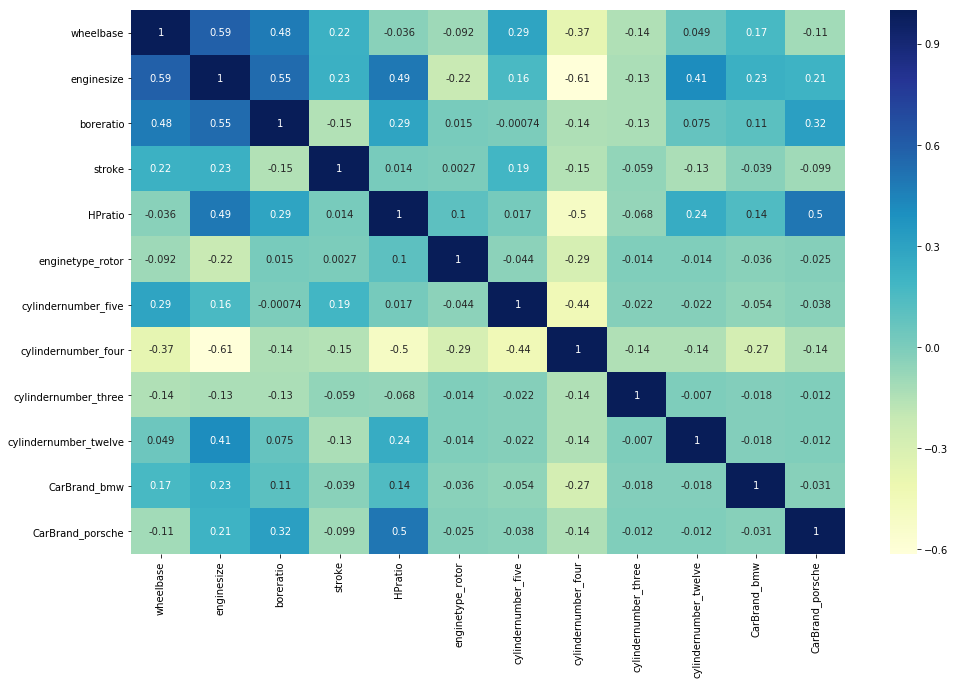

In [25]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_vif.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [26]:
#dropping boreratio feature as it has high vif and high correlation enginesize
X_train_rfe = X_train_rfe.drop(["boreratio"], axis = 1)

#Rebuilding the model without `boreratio`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.16e-58
Time:                        22:05:29   Log-Likelihood:                 177.36
No. Observations:                 143   AIC:                            -330.7
Df Residuals:                     131   BIC:                            -295.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [27]:
#hpratio has p value more that > 0.05. So dropping this feature 

X_train_rfe = X_train_rfe.drop(["HPratio"], axis = 1)

#Rebuilding the model without `HPratio`

# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)

lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     110.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.51e-59
Time:                        22:05:29   Log-Likelihood:                 176.66
No. Observations:                 143   AIC:                            -331.3
Df Residuals:                     132   BIC:                            -298.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

In [28]:
#cylindernumber_four has high p value that is why dropping this feature
X_train_rfe = X_train_rfe.drop(["cylindernumber_four"], axis = 1)

#Rebuilding the model without `cylindernumber_four`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           7.70e-60
Time:                        22:05:29   Log-Likelihood:                 176.15
No. Observations:                 143   AIC:                            -332.3
Df Residuals:                     133   BIC:                            -302.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [29]:
#cylindernumber_three has high p value that is why dropping this feature

X_train_rfe = X_train_rfe.drop(["cylindernumber_three"], axis = 1)

#Rebuilding the model without `cylindernumber_three`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm_8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.15e-60
Time:                        22:05:29   Log-Likelihood:                 174.84
No. Observations:                 143   AIC:                            -331.7
Df Residuals:                     134   BIC:                            -305.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [30]:
X_train_vif= X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,9.78
0,wheelbase,8.66
2,stroke,5.74
5,cylindernumber_twelve,1.51
7,CarBrand_porsche,1.24
6,CarBrand_bmw,1.17
4,cylindernumber_five,1.16
3,enginetype_rotor,1.11


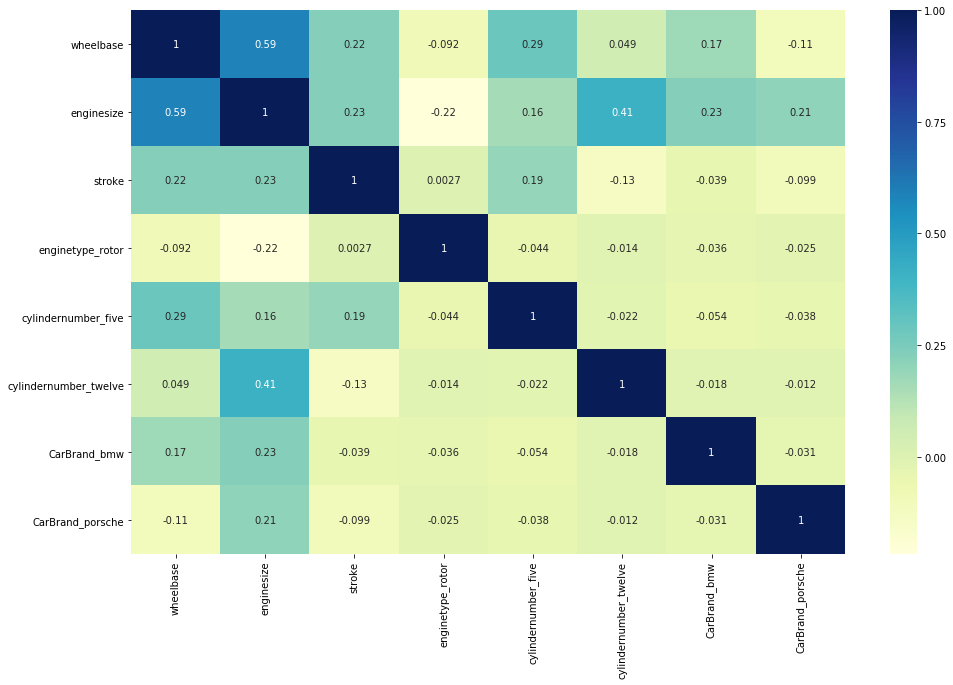

In [31]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_vif.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [32]:
#wheelbase has high correlation value with enginesize.So dropping it.

X_train_rfe = X_train_rfe.drop(["wheelbase"], axis = 1)

#Rebuilding the model without `wheelbase`

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

lm_9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.06e-58
Time:                        22:05:30   Log-Likelihood:                 167.26
No. Observations:                 143   AIC:                            -318.5
Df Residuals:                     135   BIC:                            -294.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [33]:
X_train_vif = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,5.95
1,stroke,4.87
4,cylindernumber_twelve,1.40
5,CarBrand_bmw,1.17
6,CarBrand_porsche,1.14
3,cylindernumber_five,1.13
2,enginetype_rotor,1.09


In [34]:
#Residual Analysis of the train data
y_train_price = lm_9.predict(X_train_lm)

Text(0.5, 0, 'Errors')

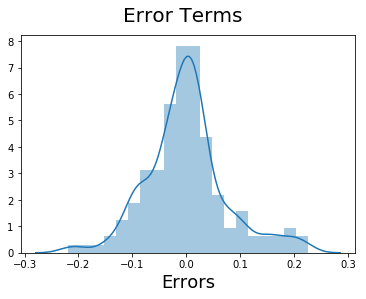

In [35]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#Although not the perfect normal distribution and centered not perfectly but almost around zero. 

In [36]:
#Applying the scaling on the test sets

num_vars = ['wheelbase','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','price','boreratio','LWRatio','WHRatio','HPratio','HCMratio']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [37]:
#Dividing dependant and indepedant variable
y_test = df_test.pop('price')
X_test = df_test

In [38]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_lm= X_train_lm.drop(['const'], axis=1)
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [39]:
# Making prediction on the test data
y_pred = lm_9.predict(X_test_new)

Text(0, 0.5, 'y_pred')

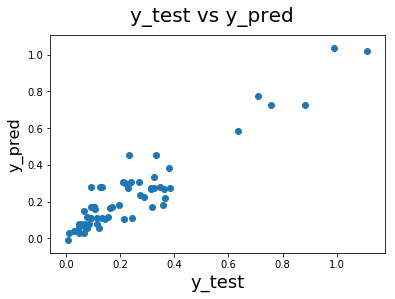

In [40]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#It is a good linear spread with some amount of variance.

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.07993084857034057
Model r2_score: 0.8804648915608538


r2_score on the test data is very close to the trained Adj. R-Squared value of the model. 
we have a significantly high r2_score and a low RMSE of 0.07.

<b>So It look like a good stable model.<b>


<h3>With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.
Final predictors which can be proposed are</h3>

|Predictor| Coeff | P value |
|---|---|---|
|enginesize | 1.2320 |0.000|
|stroke |-0.1047| 0.023 |
|enginetype_rotor|0.2701 | 0.000|
|cylindernumber_five| 0.1452 | 0.000|
|cylindernumber_twelve | -0.2998 | 0.001 |
|CarBrand_bmw | 0.1978 |  0.000|
|CarBrand_porsche | 0.1921 | 0.000 |

We can see that the equation of our best fitted line is:

$ price = -0.0489 + 1.2320  \times  enginesize -0.1047 \times stroke + 0.2701 \times enginetype\_rotor + 0.1452 \times cylindernumber\_five - 0.2998 \times cylindernumber\_twelve +0.1978 \times CarBrand\_bmw + 0.1921 \times CarBrand\_porsche$